In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [160]:
df = pd.read_excel('D:/Meta Platforms Stock Price.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-05-18,38.23,42.05,45.00,38.00,580.59M,-0.5762
1,2012-05-21,34.03,36.53,36.66,33.00,168.31M,-0.1099
2,2012-05-22,31.00,32.61,33.59,30.94,102.05M,-0.0890
3,2012-05-23,32.00,31.37,32.50,31.36,73.72M,0.0323
4,2012-05-24,33.03,32.95,33.21,31.77,50.28M,0.0322


In [87]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3160,2024-12-09,613.57,623.92,626.40,606.17,11.43M,-0.0164
3161,2024-12-10,619.32,617.56,625.59,612.74,10.94M,0.0094
3162,2024-12-11,632.68,623.37,638.40,621.53,10.84M,0.0216
3163,2024-12-12,630.79,631.50,636.66,627.21,7.47M,-0.0030
3164,2024-12-13,620.35,627.22,631.08,616.89,8.45M,-0.0166


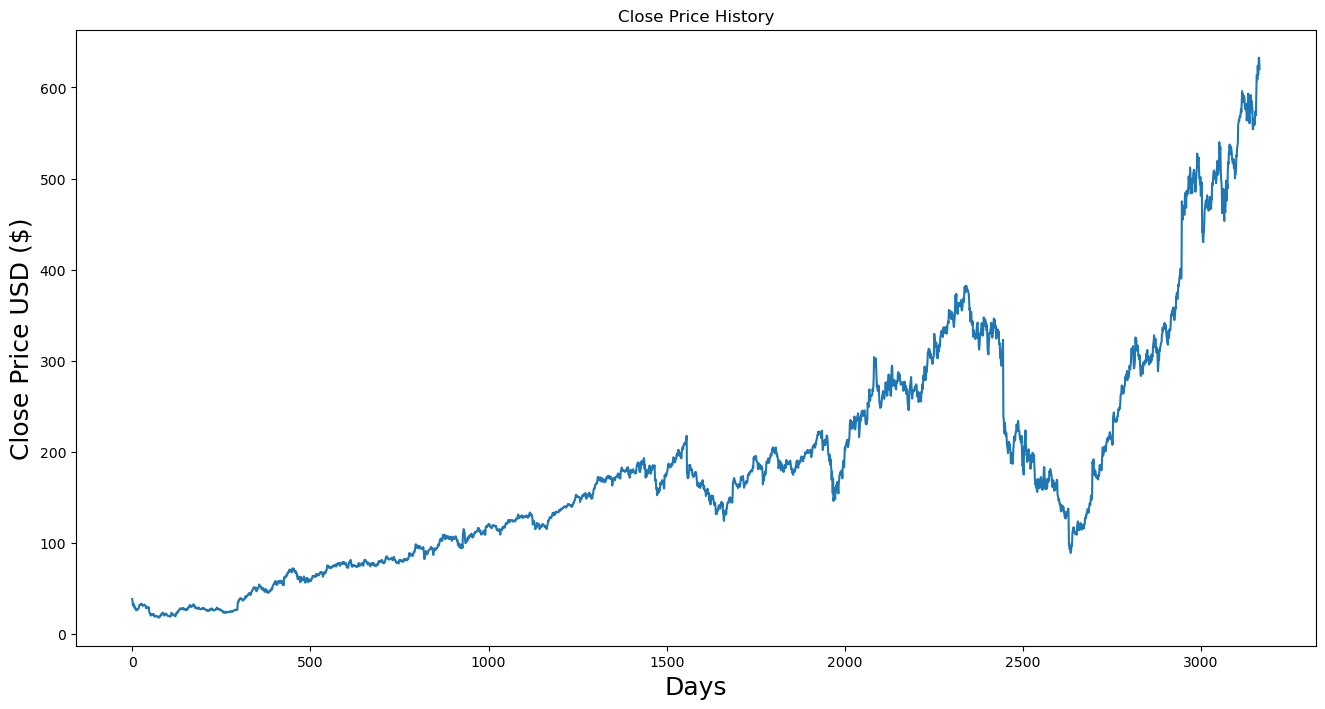

In [161]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
           

In [89]:
df.shape

(3165, 7)

In [162]:
train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(2215, 7)
(950, 7)


In [93]:
train.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-05-18,38.23,42.05,45.00,38.00,580.59M,-0.5762
1,2012-05-21,34.03,36.53,36.66,33.00,168.31M,-0.1099
2,2012-05-22,31.00,32.61,33.59,30.94,102.05M,-0.0890
3,2012-05-23,32.00,31.37,32.50,31.36,73.72M,0.0323
4,2012-05-24,33.03,32.95,33.21,31.77,50.28M,0.0322


In [94]:
test.head()

,Date,Price,Open,High,Low,Vol.,Change %
2215,2021-03-09,265.74,261.18,268.53,259.81,22.04M,0.0409
2216,2021-03-10,264.90,268.64,268.97,262.87,14.21M,-0.0032
2217,2021-03-11,273.88,268.11,277.90,267.82,21.83M,0.0339
2218,2021-03-12,268.40,269.14,269.74,264.02,20.60M,-0.0200
2219,2021-03-15,273.75,269.08,275.96,268.50,16.86M,0.0199


In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [164]:
train_price = train.iloc[:, 1:2].values
test_price = test.iloc[:, 1:2].values

In [165]:
train_price.shape

(2215, 1)

In [166]:
test_price.shape

(950, 1)

In [167]:
train_data = scaler.fit_transform(train_price)
train_data 

array([[0.07163324],
       [0.05695716],
       [0.04636942],
       ...,
       [0.83831854],
       [0.86152072],
       [0.83017681]])

In [168]:
x_train = []
y_train = [] 

for i in range(100, train_data.shape[0]):
    x_train.append(train_data[i-100: i])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [169]:
print(x_train.shape) 
print(y_train.shape)

(2115, 100, 1)
(2115,)


In [170]:
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
model.add(LSTM(units = 50, activation = 'tanh', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [171]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_23 (LSTM)              (None, 120)              

In [172]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
67/67 [==============================] - 4s 21ms/step - loss: 0.0164 - mean_absolute_error: 0.0842
Epoch 2/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0494
Epoch 3/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0042 - mean_absolute_error: 0.0447
Epoch 4/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0039 - mean_absolute_error: 0.0444
Epoch 5/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0042 - mean_absolute_error: 0.0455
Epoch 6/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0040 - mean_absolute_error: 0.0435
Epoch 7/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0434
Epoch 8/100
67/67 [==============================] - 1s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0388
Epoch 9/100
67/67 [==============================] - 1s 18ms/step - loss: 0.0028 - mean_absolute_error: 0.0371
E

In [119]:
model.save('keras_model.h5')

In [196]:
test_price.shape

(950, 1)

In [197]:
past_100_days = pd.DataFrame(train_price[-100:])
test_df = pd.DataFrame(test_price)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,0
0,276.14
1,271.82
2,266.72
3,265.93
4,261.40


In [198]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.34431837],
       [0.33637383],
       [0.32699487],
       ...,
       [1.        ],
       [0.99652427],
       [0.97732497]])

In [199]:
input_data.shape

(1050, 1)

In [200]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [201]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(950, 100, 1)
(950,)


In [202]:
y_pred = model.predict(x_test)

30/30 [==============================] - 1s 17ms/step


In [203]:
y_pred.shape

(950, 1)

In [204]:
y_test.shape

(950,)

In [205]:
scaler.scale_

array([0.00183901])

In [206]:
scale_factor = 1/0.00183901
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [208]:
y_test


array([176.83027096, 175.99026967, 184.97028343, 179.49027503,
       184.84028323, 190.3702917 , 195.10029895, 189.71029069,
       201.2003083 , 204.63031356, 201.7203091 , 193.23029609,
       189.83029088, 194.11029744, 201.91030939, 199.09030507,
       205.62031507, 209.7503214 , 220.00033711, 217.35033305,
       224.18034351, 224.1103434 , 223.55034255, 222.63034114,
       220.85033841, 213.91032777, 218.91033544, 217.27033292,
       213.33032689, 213.74032751, 212.56032571, 207.61031812,
       212.22032519, 214.13032811, 214.66032892, 218.19033433,
       240.60036867, 236.17036188, 233.67035805, 229.45035159,
       226.11034647, 231.11035413, 230.17035269, 217.0603326 ,
       217.62033346, 213.64032736, 216.35033151, 227.03034788,
       226.55034714, 221.05033872, 224.68034428, 229.70035197,
       227.32034832, 235.72036119, 238.88036604, 238.75036584,
       243.84037364, 239.82036748, 240.22036809, 240.24036812,
       237.13036335, 241.44036996, 247.67037951, 244.77

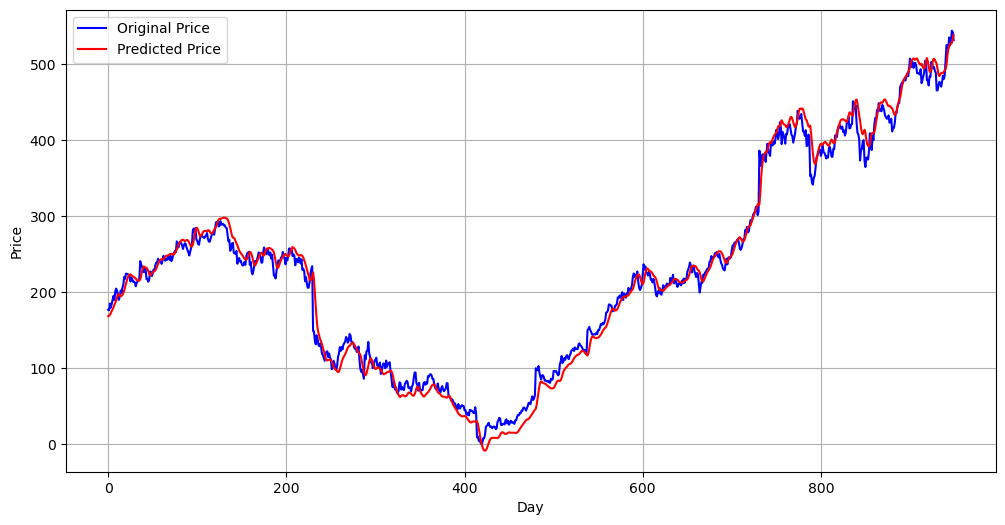

In [209]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [210]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9885833603454407


In [132]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))





Mean absolute error on test set: 3.85%


In [134]:
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("Mean squared error on test set: ", mse)

Mean squared error on test set:  54.2059768461723


In [155]:
print(y_pred.shape)
print(x_train_flat.shape)

(950, 1)
(2115, 100)
